### Emotion Detector App using Streamlit
- Detecting emotion
- Text Classifier

In [1]:
# !pip install neattext
# !pip install streamlit
# !pip install plotly

In [2]:
# Import Packages

import joblib

# Exploratory Data Analysis (EDA) Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Text Cleaning 
import neattext.functions as nfx

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Setting properties
pd.set_option('display.max_colwidth', None)

In [4]:
# Load the dataset
df = pd.read_csv("/content/emotion_dataset_raw.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang"


In [7]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [8]:
# Counting rows for Emotion types
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

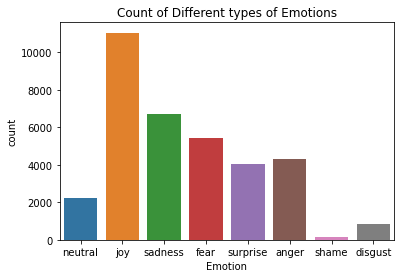

In [9]:
### Plot count of emotions
sns.countplot(x='Emotion', data=df)
plt.title("Count of Different types of Emotions")
plt.show()

In [10]:
df.shape

(34792, 2)

In [11]:
df.drop_duplicates().shape

(31162, 2)

In [12]:
34792-31162

3630

In [13]:
df = df.drop_duplicates()

In [14]:
df.drop_duplicates(['Text']).shape

(31110, 2)

In [15]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
# Removing Stopwords
df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)

In [17]:
# Removing user handles
df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)

In [18]:
df.head()

,Emotion,Text,CleanText
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS SHOWS BLESSED
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .","eye ! true hazel eye-and brilliant ! Regular features , open countenance , complexion , Oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang","ugh babe.. hugggzzz u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam fil ko ang"


In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    df['CleanText'], df['Emotion'], test_size=0.20, random_state=30)

In [20]:
sample_sent = "I am feeling good"

In [21]:
# !pip install pycaret

In [22]:
# from pycaret.classification import *

# exp_clf = setup(df, target = 'Emotion')

# # return best model
# best = compare_models()

# # return best model based on AUC
# best = compare_models(sort = 'AUC') #default is 'Accuracy'

# # compare specific models
# best_specific = compare_models(whitelist = ['dt','rf','xgboost', 'lr', 'knn', 'nb', 'rbfsvm', 'mlp', 'ada', 'gbc', 'lightgbm'])

# # blacklist certain models
# best_specific = compare_models(blacklist = ['catboost', 'svm', 'gpc', 'ridge', 'qda', 'lda', 'et'])

# # return top 3 models based on 'Accuracy'
# top2 = compare_models(n_select = 2)

As All the available RAM (12 GB in Google Colab) was being used up, I was unable to use pycaret. Hence I continued with sklearn

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [24]:
def predict_pipe(classifier):
  """
  classifier => lr, dt, rf, knn, xgboost, svm
  """
  if classifier == 'lr':
    pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])
    pipeline.fit(x_train, y_train)
    print(pipeline.predict([sample_sent]))
    pipeline.classes_
    print(pipeline.predict_proba([sample_sent]))
    print(pipeline.score(x_test, y_test))
    with open("emotion_classifier_lr.pkl", "wb") as ec:
      joblib.dump(pipeline, ec)
  if classifier == 'dt':
    pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])
    pipeline.fit(x_train, y_train)
    print(pipeline.predict([sample_sent]))
    pipeline.classes_
    print(pipeline.predict_proba([sample_sent]))
    print(pipeline.score(x_test, y_test))
    with open("emotion_classifier_dt.pkl", "wb") as ec:
      joblib.dump(pipeline, ec)
  if classifier == 'rf':
    pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])
    pipeline.fit(x_train, y_train)
    print(pipeline.predict([sample_sent]))
    pipeline.classes_
    print(pipeline.predict_proba([sample_sent]))
    print(pipeline.score(x_test, y_test))
    with open("emotion_classifier_rf.pkl", "wb") as ec:
      joblib.dump(pipeline, ec)
  if classifier == 'knn':
    pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('knn', KNeighborsClassifier())])
    pipeline.fit(x_train, y_train)
    print(pipeline.predict([sample_sent]))
    pipeline.classes_
    print(pipeline.predict_proba([sample_sent]))
    print(pipeline.score(x_test, y_test))
    with open("emotion_classifier_knn.pkl", "wb") as ec:
      joblib.dump(pipeline, ec)
  if classifier == 'xgboost':
    pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('xgboost', GradientBoostingClassifier())])
    pipeline.fit(x_train, y_train)
    print(pipeline.predict([sample_sent]))
    pipeline.classes_
    print(pipeline.predict_proba([sample_sent]))
    print(pipeline.score(x_test, y_test))
    with open("emotion_classifier_xgboost.pkl", "wb") as ec:
      joblib.dump(pipeline, ec)

In [25]:
predict_pipe('lr')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


['joy']
[[0.02366239 0.09166467 0.03032705 0.54466948 0.10351696 0.11827704
  0.00201665 0.08586575]]
0.5811005936146318


In [26]:
predict_pipe('dt')

['joy']
[[0. 0. 0. 1. 0. 0. 0. 0.]]
0.47521257821273866


In [27]:
predict_pipe('rf')

['neutral']
[[0.03       0.01       0.         0.31166667 0.42666667 0.20166667
  0.         0.02      ]]
0.5368201508102037


In [28]:
predict_pipe('knn')

['neutral']
[[0.  0.  0.  0.  0.6 0.4 0.  0. ]]
0.19813893791111825


In [29]:
predict_pipe('xgboost')

['joy']
[[1.19393311e-01 2.48169060e-02 1.22316364e-01 3.51393431e-01
  5.79212708e-02 2.00643924e-01 3.14227033e-06 1.23511651e-01]]
0.5013637092892668
